In [24]:
using CSV
using DataFrames
using JLD2
using FileIO
using Plots
using StatsBase
using Statistics

In [3]:
include("assingment_Util.jl")

LoadError: LoadError: UndefVarError: @variable not defined
in expression starting at c:\Users\timla\Projects\Seminar\assingment_Util.jl:268
in expression starting at c:\Users\timla\Projects\Seminar\assingment_Util.jl:257

### Some Initial analysis of the different TSP solutions 

In [4]:
file = File(format"JLD2", "Data/addap_output.jld2")
addap_output = JLD2.load(file)
file = File(format"JLD2", "Data/multi_output.jld2")
multi_output = JLD2.load(file)
file = File(format"JLD2", "Data/regulized_output.jld2")
regulized_output = JLD2.load(file)
file = File(format"JLD2", "Data/true_output.jld2")
true_output = JLD2.load(file)

Dict{String, Any} with 3 entries:
  "constraint" => Any[Any[(1, 2), (3, 4), (5, 6), (7, 8), (9, 10), (11, 12), (1…
  "delivery"   => Any[Any[Delivery(5.11686, 5.2098), Delivery(5.12047, 4.33409)…
  "solutions"  => Any[([0.0 0.0 … -0.0 -0.0; 0.0 0.0 … -0.0 -0.0; … ; -0.0 -0.0…

In [14]:
df = DataFrame(addap_solutions = [x[2] for x in addap_output["solutions"]],
               multi_solutions = [x[2] for x in multi_output["solutions"]],
               regulized_solutions = [x[2] for x in regulized_output["solutions"]],
               true_solutions = [x[2] for x in true_output["solutions"]])

Row,addap_solutions,multi_solutions,regulized_solutions,true_solutions
,Float64,Float64,Float64,Float64
1,5.43404,5.43404,5.70678,5.43739
2,5.04133,5.04133,5.2315,4.94202
3,5.99271,5.99271,6.43692,6.30363
4,6.24785,6.24785,6.19527,5.91458
5,5.78787,5.78787,5.89414,5.65925
6,4.83777,4.83777,5.18593,4.96947
7,6.23887,6.23887,6.33582,6.27327
8,6.57853,6.57853,6.24897,6.57483
9,5.75172,5.75172,5.88947,5.86595


In [27]:
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,addap_solutions,5.74744,3.38549,5.84365,6.76533,0,Float64
2,multi_solutions,5.74748,3.38549,5.84365,6.76533,0,Float64
3,regulized_solutions,5.86736,3.90744,5.90318,6.80368,0,Float64
4,true_solutions,5.75197,2.87601,5.8267,6.97382,0,Float64


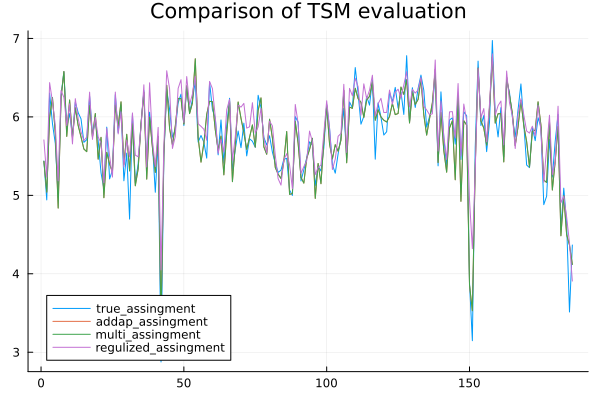

In [50]:
plot(1:186, [df[!,:true_solutions] df[!,:addap_solutions] df[!,:multi_solutions] df[!,:regulized_solutions]],
title="Comparison of TSM evaluation", label=["true_assingment" "addap_assingment" "multi_assingment" "regulized_assingment" ], linewidth=1
)